Data Mining Assgnment2
----
Xizhe Ren

230903630

This pdf is generated directly from ipynb file.

If there is something unshown in the file, can also see this a[t My Gith](https://github.com/Cat3DoG4/Data-Mining-Assignment-2)ub

Task1
====
a)
----
The advantage of using Apriori algorithm is that it is quicker suppose there are n itemsets, if we want to compute the support of every subset then 2^n subsets are to be calculated, which is not time efficiency when n is large. But while using Apriori algorithm, we uses prior knowledge of frequent properties. We first search for all frequent 1-itemset with a support larger than the threshold we set and use these subsets to generate all possible 2-itemsets (because if A is a subset of B then B's support is smaller than A), and keep doing this until all we cannot find any (k+1)-itemsets from all frequent k-itemsets. Apriori algorithm avoids calculating the support of subsets that is impossible to reach the threshold using such prior knowledge.

b)
----
Because for a frequent k-itemset, each of its subset should be a frequent itemset as well. If a k-itemset is a superset of an itemset not in L1, then the support of this k-itemset is even smaller than this 1-itemset which is not frequent because this k-itemset is its subset, thus cannot be a frequent set.

c)
----
From {1,2} and {1,4} we get {1,2,4}, from {2,3} and {2,4} we get {2,3,4}.

For {1,2,4} we also get {2,4} in L2, so {1,2,4} is the candidate.

For {2,3,4} there is no {3,4} in L2, so {2,3,4} should be removed.

Therefore, C3={{1,2,4}}.

d)
----
$$S_1=S_{\{boardingpass, passport\}\cup\{flight\}}$$
$$S_2=S_{\{boardingpass\}\cup\{ flight\}}$$
obviously {boardingpass,passport,flight} is a superset of {boardingpass, flight}, so $$S1<=S_2$$

e)
----
$$Support(\{\}\Rightarrow\{Eggs\})=\frac{N(\{\}\Rightarrow\{Eggs\})}N=\frac{N(\{Eggs\})}N=\frac45$$

f)
----
Under a threshold of 0.2, because there are only 5 transactions in the itemset, appearance for only one time is enough to be a frequent itemset. For each transaction in the dataset, the longest itemset it can appear is itself. So the maximum length of a frequent itemset is 6. The frequent 6-itemsets are :

{{'Milk'},{'Onion'},{'Nutmeg'},{'Kidney Beans'},{'Eggs'},{'Yogurt'}} and

{{'Dill'},{'Onion'},{'Nutmeg'},{'Kidney Beans'},{'Eggs'},{'Yogurt'}}


Task 2
====

a)
----

To identify unusual online transaction patterns, some possible attributes can be age groups, countries and regions, annual total transaction amount and annual transaction count. The former two attributes are contextual because it varies and we can learn the contextual outliers. For example, a 100-pound transaction may  not be treated suspicious, but it could be outliers if this happens on a 6-year-old child in poverty. This enables us to learn to distinguish outliers from its contextual information. The latter two contributes are behavioural, however, total amount and count do not feature the contextual data, but the transaction's characteristics, thus using in training the model as well.

b)
----
There are several possible methods to detect outliers. One method is clustering-based method. This is a unsupervised learning approach. We can apply a clustering task to make the whole dataset into different clusters, then we can identify outliers as object that does not belong to any cluster or belongs to a small and sparse cluster. I may choose this method on the University of Wisconsin breast cancer dataset because all the attributes in the dataset are discrete (values are all integers from 1 to 10), which means that the distribution of samples are unlikely to be normally distributed, thus Z-score and boxplots may not be that reliable. Additionally, there is a class label in the dataset and has 2 values in class label, meaning that there are several classes (at least 2) which may have different features. I assume that this dataset can apply Gaussian mixture models so clustering-based can learn the information well. Which clustering method to be used should be further verified by observing the distribution and features of these samples.

c)
----
Codes are as below.

In [1]:
# Code for Task 2, c):
import numpy as np

rainfall = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])
z_score_rainfall = (rainfall - rainfall.mean()) / rainfall.std()
print(z_score_rainfall)
print(rainfall[np.abs(z_score_rainfall)>3])

[ 0.06443672 -0.30097656  0.52446592  0.21288586  0.45758224 -3.14597989
  0.16557789  0.93718716  0.19331015 -0.01876006  0.70064732  0.20962324]
[3.25]


From the calculation above, it is easy to find that there is a value below -3 . On the normal distribution basis, the probability of this is less than 0.3% and should be treated as the outlier. The outlier sample is the 3.25 in the origin data.

d)
----

In [2]:
# Code for Task 2, d):
import pandas as pd

# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer')
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [3]:
import numpy as np

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [4]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(delta.values) # Perform fit on input data and returns labels for that input data.
#y_score = ee.decision_function(delta.values)

print(yhat) # Print labels: -1 for outliers and 1 for inliers.
percentage = yhat[yhat==-1].shape[0]/yhat.shape[0]
print("{} of the data has been classified as outliers using  one-class svm".format(percentage))

[1 1 1 ... 1 1 1]
0.17798967024235202 of the data has been classified as outliers using  one-class svm


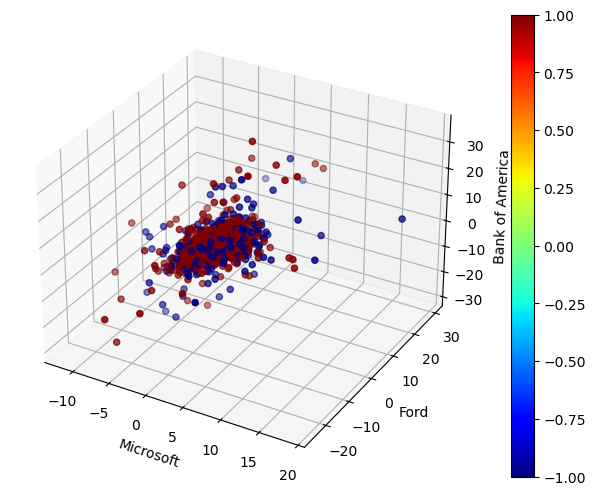

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # Specify the projection here

# Assuming delta is a DataFrame with columns 'MSFT', 'F', 'BAC'
p = ax.scatter(delta.MSFT, delta.F, delta.BAC,c=yhat,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)

plt.show()

outliers:
inliers:


array([[<Axes: title={'center': 'MSFT'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'BAC'}>, <Axes: >]], dtype=object)

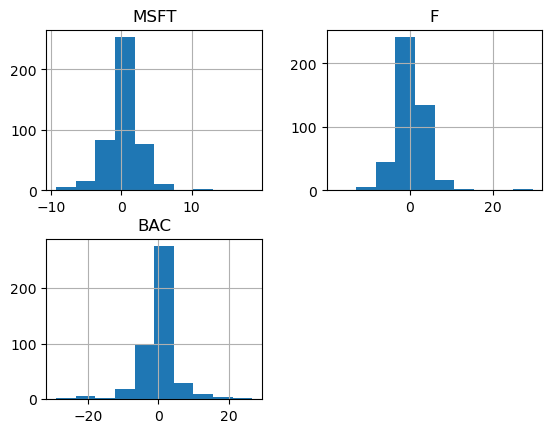

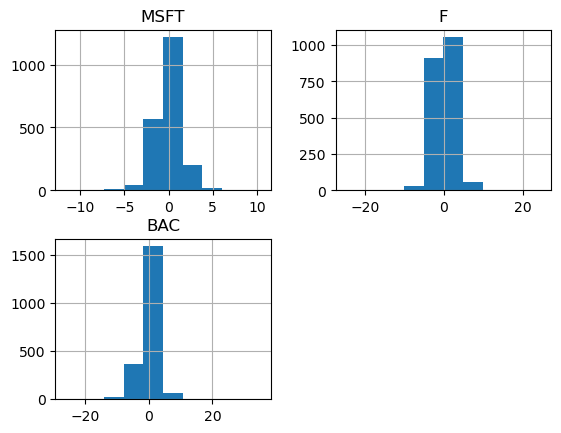

In [6]:
print("outliers:")
outliers = delta[yhat==-1]
outliers.hist()
print("inliers:")
inliers = delta[yhat==1]
inliers.hist()

As is shown above, one-class SVM classifier has identified more samples as classifier than the parametric and proximity-based methods. one-class SVM classifier does not give a outlier score to show the distance to inlier, just giving 1 for inliers and -1 for outliers. There are 17.8% of the data classified as outliers.

Task3
====
a)
----
i)

The code begins with \<html> and ends with \</html>, with no titles, then followed by the body part in \<body> and \</body>. In the body part, the title of the site is ECS766P Data Mining - Week 10. This begins with \<h1> and ends with \</h1>. the content in \<p> and \</p> is the introduction to the table below. While in the table part, it begins with \<table class ="...">. The table titles are shown in \<thread> and \</th>. \<tbody> part records the data of each transaction. For each attribute, data as well as display position (in this case, Age, Income and Online Shopper is aligned right) stores in \<tr> and \</tr>.

ii)
in order to scrap the table from the site, I should find \<table class ...> position and find \<th title="..."> for getting attribute names and \<td> for getting data. Codes are shown as below.
 |


In [7]:
# Code for Task 3, a):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

#Scrap the data in the table
table_list = []

rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td') 
    row_cells = str(row_td)
    cleantext_dataline = BeautifulSoup(row_cells, "lxml").get_text()
    table_list.append(cleantext_dataline)

print(table_list)

['[]', '[India, 49, 86400, No]', '[Brazil, 32, 57600, Yes]', '[USA, 35, 64800, No]', '[Brazil, 43, 73200, No]', '[USA, 45, , Yes]', '[India, 40, 69600, Yes]', '[Brazil, , 62400, No]', '[India, 53, 94800, Yes]', '[USA, 55, 99600, No]', '[India, 42, 80400, Yes]']


In [8]:
# Scrap the header
header_list = []

col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list
print(header_list)

['[Region, Age, Income, Online Shopper]']


In [9]:
# Transform the list of data into pd dataframe
df_table = pd.DataFrame(table_list) # transform (only one column now)
display(df_table)

,0
0,[]
1,"[India, 49, 86400, No]"
2,"[Brazil, 32, 57600, Yes]"
3,"[USA, 35, 64800, No]"
4,"[Brazil, 43, 73200, No]"
5,"[USA, 45, , Yes]"
6,"[India, 40, 69600, Yes]"
7,"[Brazil, , 62400, No]"
8,"[India, 53, 94800, Yes]"
9,"[USA, 55, 99600, No]"


In [10]:
# Split by comma"''"
df_table2 = df_table[0].str.split(',', expand=True)
display(df_table2)


,0,1,2,3
0,[],None,None,None
1,[India,49,86400,No]
2,[Brazil,32,57600,Yes]
3,[USA,35,64800,No]
4,[Brazil,43,73200,No]
5,[USA,45,,Yes]
6,[India,40,69600,Yes]
7,[Brazil,,62400,No]
8,[India,53,94800,Yes]
9,[USA,55,99600,No]


In [11]:
# Remove '[' and ']' from column 0 and 3
df_table2[0] = df_table2[0].str.strip('[')
df_table2[3] = df_table2[3].str.strip(']')

# Drop the first row: It is not the data from the table.
df_table2 = df_table2.dropna(axis=0, how='any')
display(df_table2)

,0,1,2,3
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


In [12]:
# For header, do the same as the table  and set it as title of the table.
df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

frames = [df_header2, df_table2]
df = pd.concat(frames)

df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe

df3.head(10)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


b)
----
Node 1 and 2 are authorities while node 3,4 and 5 are hubs according to the definition. An authority is a page with many in-links while hubs often go with out-link.

Task4
====
a)
----
|  I)   | data | refer | characteristic | collect | observation | dataset | view | collection | object | describe | number | attribute | feature |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| document1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| document2 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 |
| document3 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 0 |
| document4 | 1 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 1 |

II) Inverse document frequency, or IDF, considers the number of doucuments where a token occurs. The more document in which it occurs, the lower the IDF score. IDF is calculated as  $$idf_t=log_{10}\frac{N}{df_t}$$

The IDF for all words in the previous question:
|  I)   | data | refer | characteristic | collect | observation | dataset | view | collection | object | describe | number | attribute | feature |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| idf(w) | 0.125 | 0.602 | 0.301 | 0.602 | 0.602 | 0.602 | 0.602 | 0.602 | 0.301 | 0.602 | 0.602 | 0.602 | 0.602 |

b)
----

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


<Axes: xlabel='Date'>

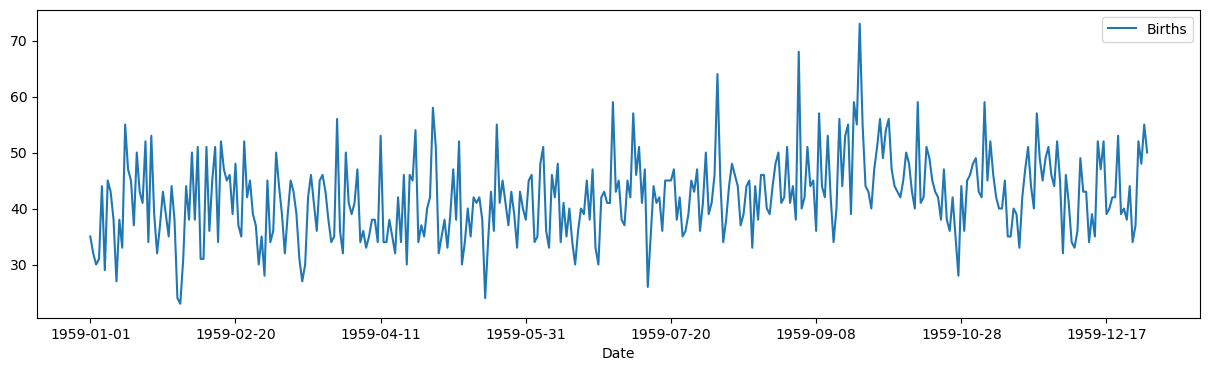

In [13]:
# code for Task 4, b):
from pandas import read_csv
import matplotlib.pyplot as plt

series = read_csv('births.csv', header=0, index_col=0)

print(series.head())
series.plot(figsize=(15,4))

               Births
Date                 
1959-01-01   0.000000
1959-01-02   0.000000
1959-01-03   0.000000
1959-01-04   0.000000
1959-01-05   0.000000
1959-01-06   0.000000
1959-01-07  35.142857
1959-01-08  36.285714
1959-01-09  37.142857
1959-01-10  36.714286


<Axes: title={'center': 'smoothed timeseries'}, xlabel='Date'>

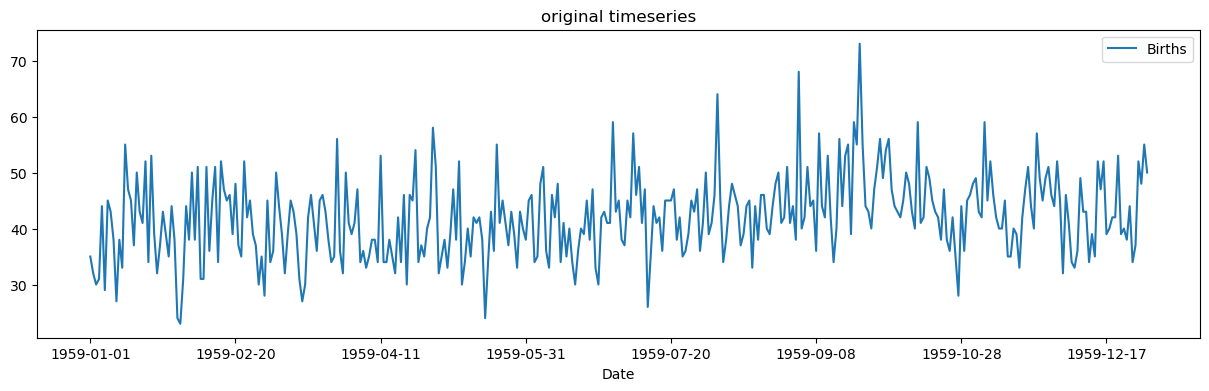

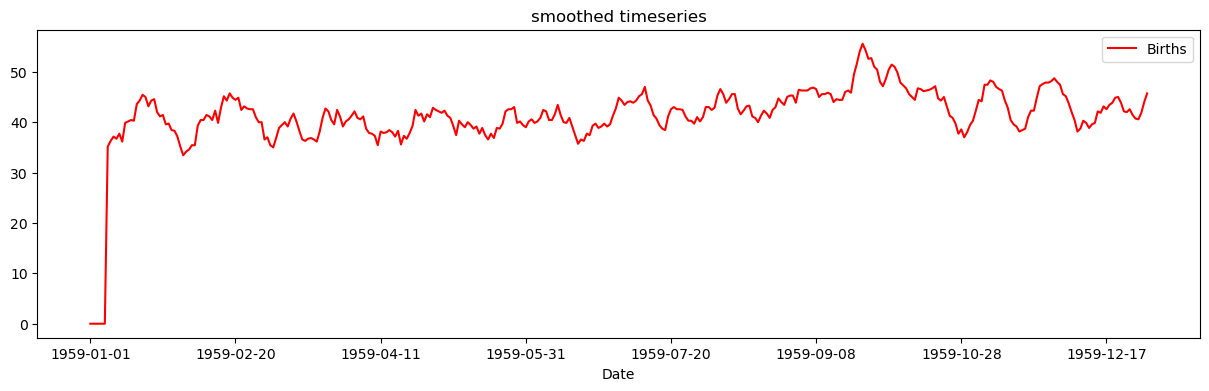

In [14]:
# Perform trailing moving average smoothing
rolling = series.rolling(window=7) # using a window of 7 samples: a week.
rolling_mean = rolling.mean()
rolling_mean.fillna(0, inplace=True) # replace NAN with 0
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot(figsize=(15,4),title='original timeseries')
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries')

In [15]:
# Initialise
from statsmodels.tsa.ar_model import AutoReg

# Fit Autoregressive model
model = AutoReg(rolling_mean['Births'], lags=2,old_names=False) #p=2
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # predict first 5 days of 1960
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [16]:
# Fit ARMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(rolling_mean['Births'], order=(2, 0, 2)) # p=2, q=2
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print(yhat)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1960-01-01    45.810248
1960-01-02    45.818768
1960-01-03    45.728095
1960-01-04    45.564019
1960-01-05    45.347309
Freq: D, Name: predicted_mean, dtype: float64
